In [1]:
import pandas as pd

In [23]:
df=pd.read_csv("ufo_sightings_scrubbed.csv", sep=',', on_bad_lines='skip', index_col=False, dtype='unicode')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   datetime              80332 non-null  object
 1   city                  80332 non-null  object
 2   state                 74535 non-null  object
 3   country               70662 non-null  object
 4   shape                 78400 non-null  object
 5   duration (seconds)    80332 non-null  object
 6   duration (hours/min)  80332 non-null  object
 7   comments              80317 non-null  object
 8   date posted           80332 non-null  object
 9   latitude              80332 non-null  object
 10  longitude             80332 non-null  object
dtypes: object(11)
memory usage: 6.7+ MB


In [25]:
df.head(1)

datetime        city state country     shape duration (seconds)  \
0  1949-10-10 20:30:00  san marcos    tx      us  cylinder               2700   

  duration (hours/min)                                           comments  \
0           45 minutes  This event took place in early fall around 194...   

  date posted    latitude   longitude   
0  2004-04-27  29.8830556  -97.9411111

In [26]:
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [27]:
#el nombre de la columna 'longitude ' tiene un espacio al final
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [28]:
#creo una lista con los nombres de las columnas
list_name=df.columns

In [29]:
#quito el espacio en blanco de la/s columna/s
#lo guardo en otra lista 
list_sin_espacio=[]
for i in list_name:
    columna=i.rstrip()
    list_sin_espacio.append(columna)

In [30]:
list_sin_espacio

['datetime',
 'city',
 'state',
 'country',
 'shape',
 'duration (seconds)',
 'duration (hours/min)',
 'comments',
 'date posted',
 'latitude',
 'longitude']

In [31]:
list_sin_espacio=['datetime','city','state','country','shape','duration_(seconds)','duration_(hours/min)','comments','date posted','latitude','longitude']

In [32]:
df.columns=list_sin_espacio

In [33]:
df[["latitude"]]=df[["latitude"]].astype('float')

ValueError: could not convert string to float: '33q.200088'

In [ ]:
indice=df.index[df["latitude"]=='33q.200088']

In [ ]:
df["latitude"].iloc[indice]='33.200088'

In [ ]:
df["latitude"].iloc[indice]

43782    33.200088
Name: latitude, dtype: object

In [ ]:
df.iloc[indice]

datetime                          city state country  \
43782  1974-05-22 05:30:00  mescalero indian reservation    nm     NaN   

           shape duration_(seconds) duration_(hours/min)  \
43782  rectangle                180            two hours   

                                                comments date posted  \
43782  Huge rectangular object emmitting intense whit...  2012-04-18   

        latitude    longitude  
43782  33.200088  -105.624152

https://www.mavenanalytics.io/data-playground?page=5

In [ ]:
df.country.value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [ ]:
#convierto las columnas en float
df[["latitude","longitude"]]=df[["latitude","longitude"]].astype('float')

In [ ]:
df[["duration (seconds)"]].astype('float')

KeyError: "None of [Index(['duration (seconds)'], dtype='object')] are in the [columns]"

In [ ]:
#copio el indice del registro del error que me da anteriormente
indice1=df.index[df["duration_(seconds)"]=='2`']

In [ ]:
#corrijo el error en el registro
df["duration_(seconds)"].iloc[indice1]='2'

C:\Users\ROXI\AppData\Local\Temp\ipykernel_6148\4252063260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration_(seconds)"].iloc[indice1]='2'


In [ ]:
df["duration_(seconds)"].iloc[indice1]

27822    2
Name: duration_(seconds), dtype: object

In [ ]:
#reemplazo el error con un 'nada' comillas vacias
old_value="`"
new_value=""
df["duration_(seconds)"]=df["duration_(seconds)"].str.replace(old_value , new_value)

In [ ]:
#intento pasar la columna a flotante nuevamente
df[["duration_(seconds)"]]=df[["duration_(seconds)"]].astype('float')

In [ ]:
"""
df["datetime"]=df["datetime"].astype('str')

new2 = df["datetime"].str.split(" ", n = 1, expand = True)

df["date"]=new2[0]
df["time"]=new2[1]
df=df.drop(columns="datetime")
df['date']= pd.to_datetime(df['date'], format="%Y/%m/%d")
"""

  

In [35]:
# vamos a tomar el año, mes, dia y hora a partir de la columna datetime
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
#data['hour'] = pd.DatetimeIndex(data['datetime']).time #este devuelve la hora y minutos
df['hour'] = pd.DatetimeIndex(df['datetime']).hour #este devuelve solo la hora

In [36]:
cuenta_por_año=df["year"].value_counts()

In [37]:
cuenta_por_año 

2012    7356
2013    7038
2011    5107
2008    4819
2009    4542
        ... 
1920       1
1916       1
1906       1
1925       1
1934       1
Name: year, Length: 87, dtype: int64

In [38]:
df.to_csv('ovnis_csv.csv', encoding='utf-8', index=False)

In [2]:
ovnis_csv=pd.read_csv(r'ovnis_csv.csv')

C:\Users\ROXI\AppData\Local\Temp\ipykernel_2840\782340929.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ovnis_csv=pd.read_csv(r'ovnis_csv.csv')


In [3]:
ovnis_csv

datetime                  city state country     shape  \
0      1949-10-10 20:30:00            san marcos    tx      us  cylinder   
1      1949-10-10 21:00:00          lackland afb    tx     NaN     light   
2      1955-10-10 17:00:00  chester (uk/england)   NaN      gb    circle   
3      1956-10-10 21:00:00                  edna    tx      us    circle   
4      1960-10-10 20:00:00               kaneohe    hi      us     light   
...                    ...                   ...   ...     ...       ...   
80327  2013-09-09 21:15:00             nashville    tn      us     light   
80328  2013-09-09 22:00:00                 boise    id      us    circle   
80329  2013-09-09 22:00:00                  napa    ca      us     other   
80330  2013-09-09 22:20:00                vienna    va      us    circle   
80331  2013-09-09 23:00:00                edmond    ok      us     cigar   

      duration_(seconds) duration_(hours/min)  \
0                   2700           45 minutes   
1                   7200              1-2 hrs   
2                     20           20 seconds   
3                     20             1/2 hour   
4                    900           15 minutes   
...                  ...                  ...   
80327              600.0           10 minutes   
80328             1200.0           20 minutes   
80329             1200.0                 hour   
80330                5.0            5 seconds   
80331             1020.0           17 minutes   

                                                comments date posted  \
0      This event took place in early fall around 194...  2004-04-27   
1      1949 Lackland AFB&#44 TX.  Lights racing acros...  2005-12-16   
2      Green/Orange circular disc over Chester&#44 En...  2008-01-21   
3      My older brother and twin sister were leaving ...  2004-01-17   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...  2004-01-22   
...                                                  ...         ...   
80327  Round from the distance/slowly changing colors...  2013-09-30   
80328  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...  2013-09-30   
80329                                       Napa UFO&#44  2013-09-30   
80330  Saw a five gold lit cicular craft moving fastl...  2013-09-30   
80331  2 witnesses 2  miles apart&#44 Red &amp; White...  2013-09-30   

         latitude   longitude  year  month  day  hour  
0      29.8830556  -97.941111  1949     10   10    20  
1        29.38421  -98.581082  1949     10   10    21  
2            53.2   -2.916667  1955     10   10    17  
3      28.9783333  -96.645833  1956     10   10    21  
4      21.4180556 -157.803611  1960     10   10    20  
...           ...         ...   ...    ...  ...   ...  
80327   36.165833  -86.784444  2013      9    9    21  
80328   43.613611 -116.202500  2013      9    9    22  
80329   38.297222 -122.284444  2013      9    9    22  
80330   38.901111  -77.265556  2013      9    9    22  
80331   35.652778  -97.477778  2013      9    9    23  

[80332 rows x 15 columns]

In [ ]:
https://www.kaggle.com/code/leogenzano/ufo-sightings-2-parte-analisis-exploratorio

In [4]:
agrupacion=ovnis_csv.groupby(by="year")["year"].count()

In [5]:
#transformo la serie en dataframe
year_df=pd.DataFrame(agrupacion)

In [6]:
#cambio el nombre de la columna year
year_df.columns=["count"]

In [7]:
year_df=year_df.reset_index()

In [8]:
year_df.describe()

year        count
count    87.000000    87.000000
mean   1969.896552   923.356322
std      27.223039  1703.176690
min    1906.000000     1.000000
25%    1949.500000    24.000000
50%    1971.000000   183.000000
75%    1992.500000   327.000000
max    2014.000000  7356.000000

In [16]:
cuenta_del_2004_al_2014=year_df[(year_df["count"]>4700) & (year_df["year"]>2004)]

In [17]:
cuenta_del_2004_al_2014

year  count
80  2008   4819
83  2011   5107
84  2012   7356
85  2013   7038

In [18]:
import matplotlib.pyplot as plt

(-1.1198287311103867,
 1.1113402281005198,
 -1.2093345749954116,
 1.1052064232591527)

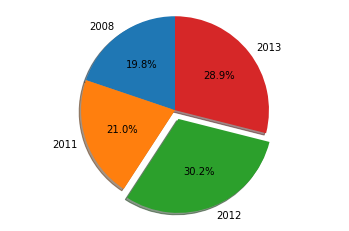

In [19]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels=cuenta_del_2004_al_2014.year.values
sizes=cuenta_del_2004_al_2014["count"].values
explode = (0,0,0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


https://stackabuse.com/matplotlib-line-plot-tutorial-and-examples/

In [309]:
years_count=year_df[year_df["year"]>2004]

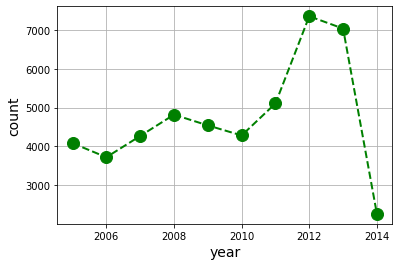

In [322]:
#grafico de lineas ordenado segun la cantidad de avistamientos odenados por año
plt.plot(years_count['year'], years_count["count"],color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xlabel('year', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.grid(True)
plt.show()

In [310]:
years_count1=years_count.sort_values(by='count')

In [306]:
#years_count1=years_count1.reset_index(drop=True)

In [312]:
years_count1["year"]=years_count1.year.astype(str)

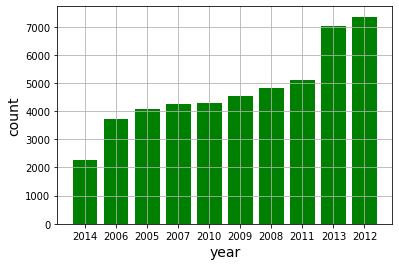

In [319]:
#grafico de barras ordenado segun e¡la cantidad de avistamientos por año
plt.bar(years_count1['year'], years_count1["count"], color='green')
plt.xlabel('year', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.grid(True)
plt.show()

In [331]:
import pandas as pd
import plotly.express as px


#el tamaño de la burbuja es segun la duration (seconds)
fig = px.scatter_mapbox(ovnis_csv, lat = 'latitude', lon = 'longitude', size = 'duration_(seconds)',
                        zoom = 4, mapbox_style = 'open-street-map')
                        
fig.show()

![mapa.jpg](mapa.jpg)

In [332]:
#filtrando el dataset para poder graficar
#df[(df["duration (seconds)"]<30)& (df["year"]>2013)]